In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np
import hvplot.pandas
from pathlib import Path

In [2]:
# Assign data files
events = "athlete_events.csv"
region = "noc_regions.csv"
# Read the data
events_data = pd.read_csv(events)
region_data = pd.read_csv(region)
#events_data.head()
#region_data.head()
#Combine the data into a single DataFrame
Olympics_df = pd.merge(events_data,region_data, how ="left", on ='NOC')
Olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [3]:
olympics_fdf = Olympics_df[['ID', 'Name', 'Sex', 'Age','Height','Weight','Team','Games','Year','Season','City','Sport','Medal','region']]
olympics_fdf

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,1976 Winter,1976,Winter,Innsbruck,Luge,NaN,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,NaN,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,NaN,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,1998 Winter,1998,Winter,Nagano,Bobsleigh,NaN,Poland


In [4]:
olympics_region=olympics_fdf.loc[olympics_fdf["Medal"]=="Gold"]
olympics_region=olympics_region.loc[olympics_fdf["Medal"]!="NaN"]
olympics_region2=olympics_region.groupby("region")
olympics_region2.head()

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gold,Finland
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gold,Finland
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gold,Finland
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Gold,Norway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246669,123513,Mara Isabel Urrutia Ocor,F,35.0,170.0,78.0,Colombia,2000 Summer,2000,Summer,Sydney,Weightlifting,Gold,Colombia
250501,125468,Edwin Gonzalo Vsquez Cam,M,25.0,NaN,NaN,Peru,1948 Summer,1948,Summer,London,Shooting,Gold,Peru
252586,126491,Igors Vihrovs,M,22.0,165.0,62.0,Latvia,2000 Summer,2000,Summer,Sydney,Gymnastics,Gold,Latvia
259005,129665,"Hannelore ""Hanni"" Wenzel (-Weirather)",F,23.0,165.0,57.0,Liechtenstein,1980 Winter,1980,Winter,Lake Placid,Alpine Skiing,Gold,Liechtenstein


In [5]:
olympics_age=olympics_fdf[olympics_fdf["Age"] !='N/A']
olympics_age.head()


,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,NaN,Netherlands


In [ ]:
olympics_fdf_cleaned = olympics_fdf.dropna(subset=['Age'])

In [ ]:
# Aleksey - Start: Fill missing Age values with the mean age using .loc
mean_age = olympics_fdf['Age'].mean()
olympics_fdf.loc[olympics_fdf['Age'].isna(), 'Age'] = mean_age

# Continue with the rest of the code for creating pie charts using olympics_fdf

In [ ]:
# Filter the data for summer and winter seasons
summer_data = olympics_fdf[olympics_fdf['Season'] == 'Summer'].copy()
winter_data = olympics_fdf[olympics_fdf['Season'] == 'Winter'].copy()

# Create age bins
age_bins = [15, 25, 31, 41, 80]  
age_labels = ['15-24', '25-30', '31-40', '41-80',]

# Apply the age bins  
summer_data.loc[:, 'Age Group'] = pd.cut(summer_data['Age'], bins=age_bins, labels=age_labels)
winter_data.loc[:, 'Age Group'] = pd.cut(winter_data['Age'], bins=age_bins, labels=age_labels)

summer_age_counts = summer_data['Age Group'].value_counts()
winter_age_counts = winter_data['Age Group'].value_counts()

# Plot pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(summer_age_counts, labels=summer_age_counts.index, autopct='%1.0f%%', startangle=90)
ax1.set_title('Summer Olympics - Age Distribution')

ax2.pie(winter_age_counts, labels=winter_age_counts.index, autopct='%1.0f%%', startangle=90)
ax2.set_title('Winter Olympics - Age Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# Filter data for gold medalists
gold_medals = olympics_fdf[olympics_fdf['Medal'] == 'Gold'].copy()

# Create a 'Decade' column without modifying the original DataFrame
gold_medals['Decade'] = (gold_medals['Year'] // 10) * 10

# Group data by country and decade
grouped = gold_medals.groupby(['Decade', 'region'])['Medal'].count().reset_index()

# Pivot the data to get countries as columns
pivot_df = grouped.pivot(index='Decade', columns='region', values='Medal')

# Get the top five countries for each decade
top_countries = pivot_df.idxmax(axis=1).value_counts().head(5).index

# Filter data for the top five countries
top_countries_data = pivot_df[top_countries]



# Plot line graph
plt.figure(figsize=(12, 8))
top_countries_data.plot(kind='line', marker='o')

plt.title('Top 5 Countries Winning Gold Medals Over Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Gold Medals')
plt.legend(title='Country', loc='upper left')

plt.grid(True)
plt.show()

plt.savefig("data/top_countries_data.png")

In [ ]:
# Anusha Start -change age to int and set age of null records to mode value for calculation 
olympics_age['Age'] =olympics_age['Age'].fillna(0)
#olympics_age.Medal=olympics_age.fillna('None')
olympics_age.Age=olympics_age.Age.astype(int)

In [ ]:
na_values=olympics_age.isna()
na_columns=na_values.any()
coulums_with_na= olympics_age.columns[na_columns].tolist()
print(coulums_with_na)

In [ ]:
olympics_age.Medal =olympics_age.Medal.fillna('No Medal')

In [ ]:
#List events with higest medal 
High_sport=olympics_age.Sport.value_counts().sort_values(ascending=False).head(5)
High_sport

In [ ]:
Popular_Sport=olympics_age.Sport.value_counts().sort_values(ascending=False).head(1)
Popular_Sport

In [ ]:
##List events with Least medal 
Low_sport=olympics_age.Sport.value_counts().sort_values(ascending=True).head(5)
Low_sport

In [ ]:
Uncommon_Sport=olympics_age.Sport.value_counts().sort_values(ascending=True).head(1)
Uncommon_Sport

In [ ]:
plt.plot(Low_sport)
plt.xlabel('Sport')
plt.ylabel('# of Participants')
plt.title(' Sport with Low Participation in Olyimpics')
plt.show
plt.savefig("Low_Participation.png")

In [ ]:
plt.plot(High_sport)
plt.xlabel('Sport')
plt.ylabel('# of Participants')
plt.title(' Sport with Highest Participation in Olyimpics')
plt.show
plt.savefig("High_Participation.png")

In [ ]:
#Total sport 
olympics_sport=olympics_age.groupby('Sport')
olympics_sport_count=len(olympics_sport)
olympics_sport_count

In [ ]:
olympics_sport_year=olympics_age.groupby('Year')
olympics_sport_year_count=len(olympics_sport_year)
olympics_sport_year_count

In [ ]:
winter_olympic = olympics_age[olympics_age.Season=='Winter']
winter_sports = len(winter_olympic[['Sport']].drop_duplicates())
print(f'Number of Sports Played In Winter Olympics: {winter_sports}')
winter_olympic

In [ ]:
Summer_olympic = olympics_age[olympics_age.Season=='Summer']
Summer_sports = len(Summer_olympic[['Sport']].drop_duplicates())
print(f'Number of Sports Played In Summer Olympics: {Summer_sports}')
Summer_olympic

In [ ]:
agg_max=olympics_age.groupby('Sport').Age.agg(['max'])
agg_min=olympics_age.groupby('Sport').Age.agg(['min'])
agg_avg=olympics_age.groupby('Sport').Age.agg(['mean'])
agg=olympics_age.groupby('Sport').Age.agg(['mean','max','min'])
agg

In [ ]:
Top_Sport=['Athletics','Gymnastics','Swimming','Shooting','Cycling']
Bottom_Sport=['Aeronautics','Basque Pelota','Roque','Jeu De Paume','Racquets']
data_top = olympics_age[olympics_age["Sport"].isin(Top_Sport)]
data_Bottom=olympics_age[olympics_age["Sport"].isin(Bottom_Sport)]

In [ ]:
top_sport=olympics_age['Sport'].value_counts().sort_values(ascending=False)[:1]
bottom_sport=olympics_age['Sport'].value_counts().sort_values(ascending=True)[:1]
olympics_age['Sport'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar' ,title='Top 10 - Olympic Sports')
plt.ylabel('# of Participants')
plt.xlabel('Sport')
plt.show()
plt.savefig("Top_10_Sports.png")

In [ ]:
#olympics_age['Age'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar' ,title='Highest Participation by Age Group')

olympics_age['Age'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar' ,title='Highest Participation by Age Group')
plt.ylabel('# of Participants')
plt.xlabel('Age')
plt.show()
plt.savefig("Highest_Participation_by_Age.png")

In [ ]:
#Summary 
# replace 0 age group with Mean Age 
olympics_age1=olympics_age
olympics_age1.replace(to_replace = 0, value = olympics_age1.mean(), inplace=True)
max_age= olympics_age1['Age'].max()
min_age= olympics_age1['Age'].min()
Sport_mean = olympics_age1['Age'].mean()

In [ ]:
print(f"------------------------------------------------------------")
print(f"Dataset has data for {olympics_sport_year_count} Years ")
print(f"The Most Popular sport in the Olympics has {Popular_Sport[0]} Participants ")
print(f"The uncommon sport in the Olympics has {Uncommon_Sport[0]} Participant")
print(f"Top Sports are {Top_Sport} ")
print(f"Most Uncommon Sports are {Bottom_Sport}")
print(f"The Oldest Participant is of Age {max_age}")
print(f"The Youngest Participant is of Age {min_age}")
print(f"The Average Age of Participants is {Sport_mean}")
print(f'Number of Sports Played In Summer Olympics: {Summer_sports}')
print(f'Number of Sports Played In Winter Olympics: {winter_sports}')
print(f"Total # of Olympic Sport is: {olympics_sport_count}")
    # print(f"Values above {upper_bound} could be {drug} outliers.")
print(f"------------------------------------------------------------")

In [ ]:
with open("Analysis_file", "w") as outfile:   
 
    outfile.write("Olympics Data Analayis of Sport and Age after replacing Null age with the Mean Age of participants\n")
    outfile.write(f"------------------------------------------------------------\n")
    outfile.write(f"Dataset analysed has data for {olympics_sport_year_count} Years\n")
    outfile.write(f"The Most Popular sport in the Olympics has {Popular_Sport[0]} Participants\n")
    outfile.write(f"The uncommon sport in the Olympics has {Uncommon_Sport[0]} Participant\n")
    outfile.write(f"Top Sports are {Top_Sport}\n")
    outfile.write(f"Most Uncommon Sports are {Bottom_Sport}\n")
    outfile.write(f"The Oldest Participant is of Age {max_age}\n")
    outfile.write(f"The Youngest Participant is of Age {min_age}\n")
    outfile.write(f"The Average Age of Participants is {Sport_mean}\n")
    outfile.write(f"Number of Sports Played In Summer Olympics: {Summer_sports}\n")
    outfile.write(f"Number of Sports Played In Winter Olympics: {winter_sports}\n")
    outfile.write(f"Total # of Olympic Sport is: {olympics_sport_count}\n")
    outfile.write(f"------------------------------------------------------------\n")

In [6]:
# Chris Start
olympics_data = pd.read_csv('athlete_events.csv')
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
olympics_data.dropna(subset=['Age', 'Weight'], inplace=True)
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
olympics_data.dropna(subset=['Medal'], inplace=True)
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [9]:
# Count how many loss incidents occurred in each city
grouped_age = olympics_data.groupby(["Age"])
grouped_age.count()

,ID,Name,Sex,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Age,,,,,,,,,,,,,,
12.0,2,2,2,0,2,2,2,2,2,2,2,2,2,2
13.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10
14.0,53,53,53,53,53,53,53,53,53,53,53,53,53,53
15.0,155,155,155,155,155,155,155,155,155,155,155,155,155,155
16.0,284,284,284,284,284,284,284,284,284,284,284,284,284,284
17.0,400,400,400,399,400,400,400,400,400,400,400,400,400,400
18.0,646,646,646,644,646,646,646,646,646,646,646,646,646,646
19.0,1033,1033,1033,1025,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033
20.0,1562,1562,1562,1550,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562


In [10]:
age_by_medal = grouped_age["Medal"].count()

# Convert the city_counts Series into a DataFrame
fixed_medals = pd.DataFrame(age_by_medal)
fixed_medals.head(55)

,Medal
Age,
12.0,2
13.0,10
14.0,53
15.0,155
16.0,284
17.0,400
18.0,646
19.0,1033
20.0,1562


Text(0.5, 1.0, 'Medal Count By Age')

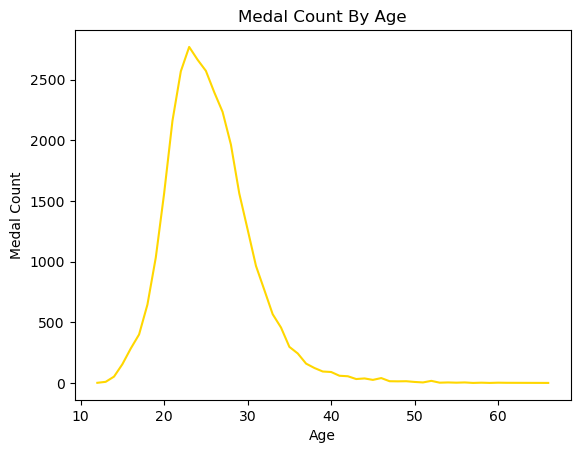

In [13]:
plt.title("Medal Count By Age")
plt.xlabel("Age")
plt.ylabel("Medal Count")
plt.plot(fixed_medals, color='gold')
plt.title("Medal Count By Age")

40        28.0
41        28.0
42        28.0
44        28.0
48        28.0
          ... 
271078    25.0
271080    33.0
271082    28.0
271102    19.0
271103    23.0
Name: Age, Length: 30425, dtype: float64
40        85.0
41        64.0
42        64.0
44        64.0
48        64.0
          ... 
271078    80.0
271080    80.0
271082    82.0
271102    64.0
271103    64.0
Name: Weight, Length: 30425, dtype: float64


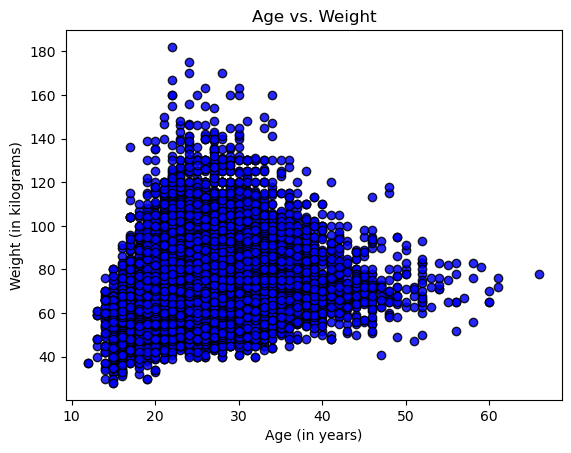

In [15]:
# Build scatter plot for Age vs. Weight

age_scatter = olympics_data['Age']
print(age_scatter)
weight_scatter = olympics_data['Weight']
print(weight_scatter)

plt.scatter(age_scatter, weight_scatter, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.85)

# Incorporate the other graph properties
plt.ylabel('Weight (in kilograms)')
plt.xlabel('Age (in years)')
plt.title("Age vs. Weight")


plt.show()

y = 0.49x + 61.4


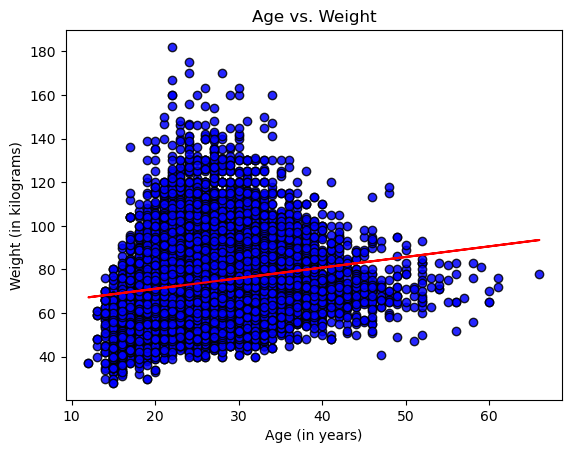

In [17]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(age_scatter, weight_scatter)
regress_values = age_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(age_scatter,weight_scatter, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.85 )
plt.plot(age_scatter,regress_values,"-r")
plt.ylabel('Weight (in kilograms)')
plt.xlabel('Age (in years)')
plt.title("Age vs. Weight")
plt.show()

In [18]:
olympics_data.dropna(subset=['Medal'], inplace=True)
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [19]:
#collect only Gold medals
gold_olympics_data = olympics_data.loc[(olympics_data["Medal"] == "Gold")]
gold_olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold


42        28.0
44        28.0
48        28.0
60        20.0
73        30.0
          ... 
270981    23.0
271009    28.0
271016    29.0
271049    31.0
271076    21.0
Name: Age, Length: 10248, dtype: float64
42        64.0
44        64.0
48        64.0
60        85.0
73        85.0
          ... 
270981    90.0
271009    60.0
271016    93.0
271049    93.0
271076    80.0
Name: Weight, Length: 10248, dtype: float64


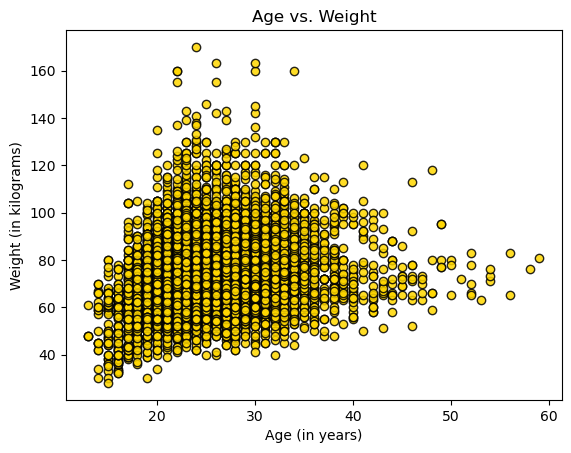

In [20]:
# Build scatter plot for Age vs. Weight

age_scatter = gold_olympics_data['Age']
print(age_scatter)
weight_scatter = gold_olympics_data['Weight']
print(weight_scatter)

plt.scatter(age_scatter, weight_scatter, marker="o", facecolors="gold", edgecolors="black",
             alpha=0.85)

# Incorporate the other graph properties
plt.ylabel('Weight (in kilograms)')
plt.xlabel('Age (in years)')
plt.title("Age vs. Weight")


plt.show()

In [21]:
olympics_data.dropna(subset=['Medal'], inplace=True)
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [22]:
olympics_data.isnull().sum()

ID          0
Name        0
Sex         0
Age         0
Height    244
Weight      0
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64

In [26]:
#Allison Start
olympic_load = Path("olympic_merged.csv")

# Read School and Student Data File and store into Pandas DataFrames
olympic_merged = pd.read_csv(olympic_load )

In [27]:
olympic_merged_ap=olympic_merged.fillna("NA")
olympic_merged_ap=olympic_merged.loc[olympic_merged["Medal"]!="NA",:]
olympic_merged_ap=olympic_merged.loc[olympic_merged["Age"]!="NA",:]

olympic_merged_m=olympic_merged.loc[olympic_merged["Sex"]!="M",:]
olympic_merged_m_list=olympic_merged_m[["Age","ID"]].copy()
olympic_m_age=olympic_merged_m_list.values.tolist()

In [28]:
olympic_merged_f=olympic_merged.loc[olympic_merged["Sex"]!="F",:]
olympic_merged_f_list=olympic_merged_f[["Age","ID"]].copy()
olympic_f_age=olympic_merged_f_list.values.tolist()

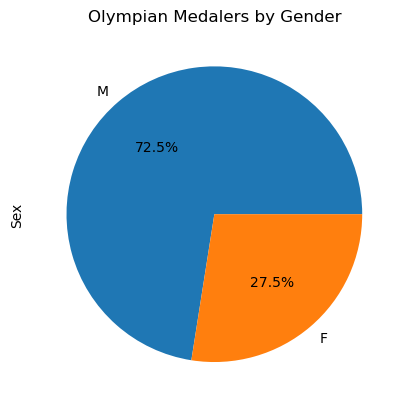

FileNotFoundError: [Errno 2] No such file or directory: 'Output/pie.jpg'

<Figure size 640x480 with 0 Axes>

In [30]:
gender_chart=olympic_merged_ap["Sex"].value_counts()
plt.title("Olympian Medalers by Gender")
gender_chart.plot.pie(autopct= "%1.1f%%")
plt.show()
plt.savefig("Output/pie.jpg")

In [34]:
age_bin=[15,24,30,40,80]
labels = ["15-24", "25-30", "31-40", "41-80"]
olympic_merged_ap2=olympic_merged_ap.copy()
olympic_merged_ap2["Age by Decade"]=pd.cut(olympic_merged_ap["Age"],age_bin,labels=labels,include_lowest=True)
olympic_merged_f=olympic_merged_ap2.loc[olympic_merged_ap["Sex"]!="F",:]
olympic_merged_m=olympic_merged_ap2.loc[olympic_merged_ap["Sex"]!="M",:]

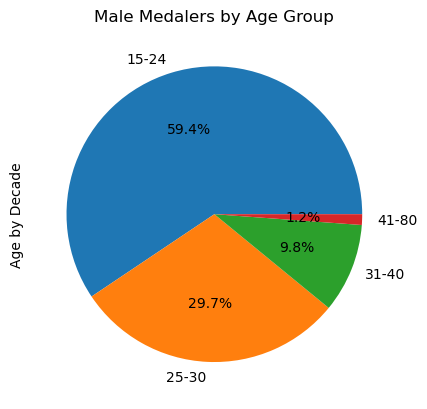

In [35]:
age_m_chart=olympic_merged_m["Age by Decade"].value_counts()
plt.title("Male Medalers by Age Group")
age_m_chart.plot.pie(autopct= "%1.1f%%")
plt.show()

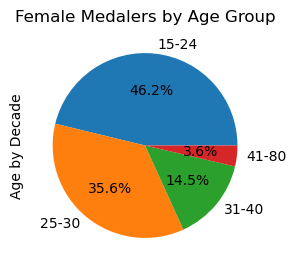

<Figure size 640x480 with 0 Axes>

In [36]:
age_f_chart=olympic_merged_f["Age by Decade"].value_counts()
plt.title("Female Medalers by Age Group")
age_f_chart.plot.pie(autopct= "%1.1f%%",figsize=(3,3))
plt.show()
plt.savefig("f_plot.png")

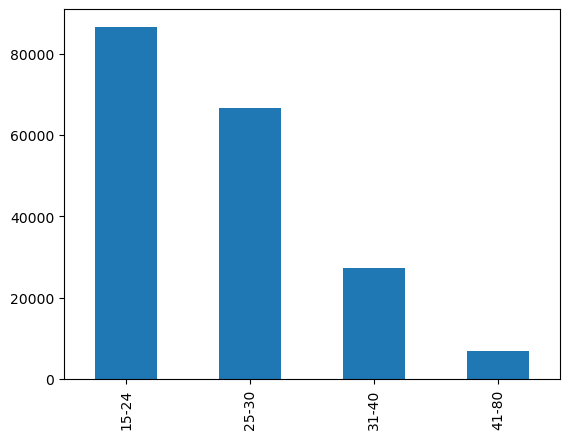

In [37]:
age_f_chart.plot.bar(x="Medal",y="Age")
plt.show()

In [38]:
olympics_age.dropna(subset=['Medal'],inplace=True)
olympics_age.head()

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,1920 Summer,1920,Summer,Antwerpen,Swimming,Bronze,Finland
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,1920 Summer,1920,Summer,Antwerpen,Swimming,Bronze,Finland
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,2014 Winter,2014,Winter,Sochi,Ice Hockey,Bronze,Finland
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,Bronze,Finland


In [39]:
region=olympics_age.groupby('region').Age.max()
region.tail()

region
Venezuela             52.0
Vietnam               41.0
Virgin Islands, US    27.0
Zambia                27.0
Zimbabwe              35.0
Name: Age, dtype: float64

In [40]:
agg=olympics_age.groupby('region').Age.agg(['count','max','min','mean'])
agg

,count,max,min,mean
region,,,,
Afghanistan,2,25.0,21.0,23.000000
Algeria,17,29.0,19.0,24.117647
Argentina,274,56.0,18.0,26.423358
Armenia,16,28.0,19.0,23.375000
Australia,1344,61.0,14.0,24.802827
...,...,...,...,...
Venezuela,15,52.0,19.0,24.200000
Vietnam,4,41.0,23.0,32.750000
"Virgin Islands, US",1,27.0,27.0,27.000000


In [41]:
regiongold=olympics_fdf.groupby('region').Medal.count()
regiongold

region
Afghanistan                 2
Albania                     0
Algeria                    17
American Samoa              0
Andorra                     0
                           ..
Virgin Islands, British     0
Virgin Islands, US          1
Yemen                       0
Zambia                      2
Zimbabwe                   22
Name: Medal, Length: 205, dtype: int64

In [42]:
boxplot = olympics_age.hvplot.box(y='Age', by='Medal', c='gold', height=450, width=450, legend=False)
boxplot

:BoxWhisker   [Medal]   (Age)

In [43]:
olympicscoordinates = "Lat_Long.csv"
df_loc = pd.read_csv(olympicscoordinates)
olympiclocations = pd.merge(Olympics_df,df_loc, how ="left", on ='region')
olympiclocations.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,country,latitude,longitude
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,CN,35.861660,104.195397
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,CN,35.861660,104.195397
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,DK,56.263920,9.501785
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,DK,56.263920,9.501785
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,NL,52.132633,5.291266


In [44]:
olympiclocations.dropna(subset=['Age','Medal'],inplace=True)
olympics_map1 = olympiclocations[['Age','Medal','region','latitude','longitude']]
nz=olympics_map1[olympics_map1["region"] =='New Zealand']
nz

,Age,Medal,region,latitude,longitude
1238,27.0,Gold,New Zealand,-40.900557,174.885971
1527,23.0,Gold,New Zealand,-40.900557,174.885971
1528,27.0,Gold,New Zealand,-40.900557,174.885971
1529,31.0,Silver,New Zealand,-40.900557,174.885971
4317,26.0,Gold,New Zealand,-40.900557,174.885971
...,...,...,...,...,...
261251,33.0,Bronze,New Zealand,-40.900557,174.885971
261533,23.0,Gold,New Zealand,-40.900557,174.885971
261534,27.0,Bronze,New Zealand,-40.900557,174.885971
262850,25.0,Silver,New Zealand,-40.900557,174.885971


In [45]:
nozeroes = olympics_map1.loc[(olympics_map1!=0).any(axis=1)]
nozeroes

,Age,Medal,region,latitude,longitude
3,34.0,Gold,Denmark,56.263920,9.501785
37,30.0,Bronze,Finland,61.924110,25.748151
38,30.0,Bronze,Finland,61.924110,25.748151
40,28.0,Bronze,Finland,61.924110,25.748151
41,28.0,Bronze,Finland,61.924110,25.748151
...,...,...,...,...,...
271078,25.0,Silver,Russia,61.524010,105.318756
271080,33.0,Bronze,Russia,61.524010,105.318756
271082,28.0,Bronze,Poland,51.919438,19.145136
271102,19.0,Bronze,Russia,61.524010,105.318756


In [ ]:
olympics_map1['Gold']=0
olympics_map1.loc[olympics_map1['Medal']=="Gold","Gold"]=1


In [46]:
newolympics_mapdf=olympics_map1.copy()
newolympics_mapdf['sizeMedal']=1
newolympics_mapdf.loc[olympics_map1['Medal']=="Gold","sizeMedal"]=10
newolympics_mapdf.loc[olympics_map1['Medal']=="Silver","sizeMedal"]=6
newolympics_mapdf.loc[olympics_map1['Medal']=="Bronze","sizeMedal"]=3
newolympics_mapdf

,Age,Medal,region,latitude,longitude,sizeMedal
3,34.0,Gold,Denmark,56.263920,9.501785,10
37,30.0,Bronze,Finland,61.924110,25.748151,3
38,30.0,Bronze,Finland,61.924110,25.748151,3
40,28.0,Bronze,Finland,61.924110,25.748151,3
41,28.0,Bronze,Finland,61.924110,25.748151,3
...,...,...,...,...,...,...
271078,25.0,Silver,Russia,61.524010,105.318756,6
271080,33.0,Bronze,Russia,61.524010,105.318756,3
271082,28.0,Bronze,Poland,51.919438,19.145136,3
271102,19.0,Bronze,Russia,61.524010,105.318756,3


In [47]:
newolympics_mapdf=newolympics_mapdf.loc[newolympics_mapdf["sizeMedal"]>1]
newolympics_mapdf

,Age,Medal,region,latitude,longitude,sizeMedal
3,34.0,Gold,Denmark,56.263920,9.501785,10
37,30.0,Bronze,Finland,61.924110,25.748151,3
38,30.0,Bronze,Finland,61.924110,25.748151,3
40,28.0,Bronze,Finland,61.924110,25.748151,3
41,28.0,Bronze,Finland,61.924110,25.748151,3
...,...,...,...,...,...,...
271078,25.0,Silver,Russia,61.524010,105.318756,6
271080,33.0,Bronze,Russia,61.524010,105.318756,3
271082,28.0,Bronze,Poland,51.919438,19.145136,3
271102,19.0,Bronze,Russia,61.524010,105.318756,3


In [48]:
newolympics_mapdf.dtypes

Age          float64
Medal         object
region        object
latitude     float64
longitude    float64
sizeMedal      int64
dtype: object

In [49]:
newolympics_mapdf['Medal']=newolympics_mapdf['Medal'].astype(str)

In [50]:
newolympics_mapdf.dtypes

Age          float64
Medal         object
region        object
latitude     float64
longitude    float64
sizeMedal      int64
dtype: object

In [51]:
check=olympics_map1.loc[olympics_map1['Age'] <= 0]
olympics_map1.dtypes

Age          float64
Medal         object
region        object
latitude     float64
longitude    float64
dtype: object

In [52]:
newolympics_mapdf

,Age,Medal,region,latitude,longitude,sizeMedal
3,34.0,Gold,Denmark,56.263920,9.501785,10
37,30.0,Bronze,Finland,61.924110,25.748151,3
38,30.0,Bronze,Finland,61.924110,25.748151,3
40,28.0,Bronze,Finland,61.924110,25.748151,3
41,28.0,Bronze,Finland,61.924110,25.748151,3
...,...,...,...,...,...,...
271078,25.0,Silver,Russia,61.524010,105.318756,6
271080,33.0,Bronze,Russia,61.524010,105.318756,3
271082,28.0,Bronze,Poland,51.919438,19.145136,3
271102,19.0,Bronze,Russia,61.524010,105.318756,3


In [ ]:
map_plot_2=newolympics_mapdf.hvplot.points(
    'longitude',
    'latitude',
    geo = True,
    tiles = "EsriImagery",
    color="sizeMedal",
    frame_width = 700,
    frame_height = 500,
    scale = .5)
map_plot_2

In [53]:
map_plot_1=olympics_map1.hvplot.points(
    'longitude',
    'latitude',
    geo = True,
    tiles = "EsriImagery",
    scale = 0.5)
map_plot_1

C:\Users\clayt\anaconda3\envs\dev\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]

In [55]:
YoungestBronze=olympics_age.loc[olympics_age['Medal']=='Bronze'].Age.min()
YoungestBronze1=olympics_age.loc[olympics_age['Name']==YoungestBronze]
YoungestBronze1

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region


In [56]:
#olympics_age.to_csv('olympic_merged.csv')

In [57]:
just_gold = olympics_age.loc[olympics_age['Medal'] == "Gold"]
just_gold.head()
just_gold.count()

ID        13372
Name      13372
Sex       13372
Age       13224
Height    10539
Weight    10254
Team      13372
Games     13372
Year      13372
Season    13372
City      13372
Sport     13372
Medal     13372
region    13371
dtype: int64

In [58]:
olympics_age.count()

ID        39783
Name      39783
Sex       39783
Age       39051
Height    31072
Weight    30456
Team      39783
Games     39783
Year      39783
Season    39783
City      39783
Sport     39783
Medal     39783
region    39774
dtype: int64